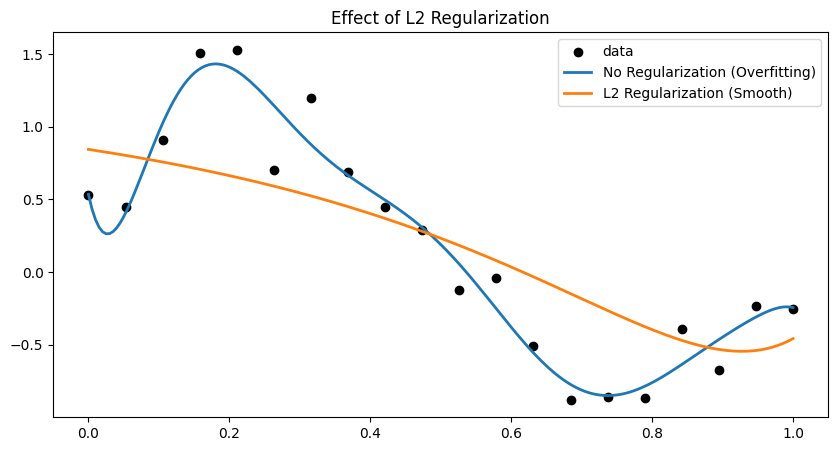

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 乱数
np.random.seed(0)

# --- データ生成（ノイズが多い） ---
X = np.linspace(0, 1, 20)
y = np.sin(2 * np.pi * X) + np.random.randn(20) * 0.3  # ノイズ大きめ
X = X[:, np.newaxis]

# --- 多項式回帰（3次） ---
degree = 10  # 過学習させるため10次を使用

# L2 なし（普通の線形回帰）
model_no_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_no_reg.fit(X, y)

# L2 あり（Ridge 回帰）
model_l2 = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
model_l2.fit(X, y)

# プロット用データ
X_test = np.linspace(0, 1, 200)[:, np.newaxis]

y_no_reg = model_no_reg.predict(X_test)
y_l2 = model_l2.predict(X_test)

# --- 可視化 ---
plt.figure(figsize=(10, 5))

# 元データ
plt.scatter(X, y, color='black', label='data')

# L2 なし
plt.plot(X_test, y_no_reg, label='No Regularization (Overfitting)', linewidth=2)

# L2 あり
plt.plot(X_test, y_l2, label='L2 Regularization (Smooth)', linewidth=2)

plt.title("Effect of L2 Regularization")
plt.legend()
plt.show()
